# 作业三：分类与预测
数据集：[Video Game Sales](https://www.kaggle.com/gregorut/videogamesales)
[github地址](https://github.com/ayouayou/DM_3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns

## 数据预览

In [2]:
data_filename="D:\Course\DM\\vgsales.csv"
dt_ord=pd.read_csv(data_filename)
dt_ord.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [3]:
# 由于2017之后的数据特别少，故删除
dt_ord=dt_ord[dt_ord['Year']<2017]

### 数据描述
Rank - 总销量排名

Name - 游戏名称

Platform - 发布平台

Year - 发布年份

Genre - 游戏类别

Publisher - 发行商

NA_Sales - 北美地区销售额

EU_Sales - 欧洲地区销售额

JP_Sales - 日本地区销售额

Other_Sales - 其他地区销售额

Global_Sales - 全球总销售额

### 目标
1、电子游戏市场分析：受欢迎的游戏、类型、发布平台、发行人等；

2、预测每年电子游戏销售额。

3、可视化应用：如何完整清晰地展示这个销售故事。

## 电子游戏市场分析及可视化应用

#### 从每年销量最高的游戏角度分析

In [4]:
dt=dt_ord
game=dt.groupby('Year').apply(lambda x:x[x.Global_Sales==x.Global_Sales.max()])
game

,,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,,,
1980.0,258,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1981.0,239,240,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.00,0.05,4.50
1982.0,89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
1983.0,421,422,Baseball,NES,1983.0,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
1984.0,9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1985.0,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
1986.0,127,128,The Legend of Zelda,NES,1986.0,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
1987.0,251,252,Zelda II: The Adventure of Link,NES,1987.0,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
1988.0,22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28


根据上述数据表明了每年发行的游戏中销量最高的游戏以及其相关信息 ，可以看到Call of Duty, Grand Theft Auto, Super Mario, Pokémon等系列游戏多次上榜。

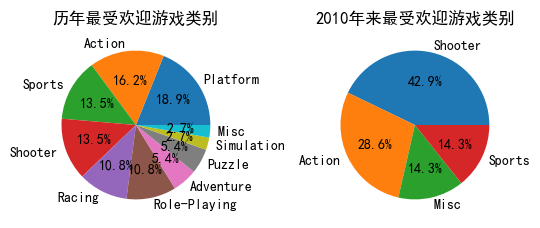

In [5]:
game2=game[game['Year']>=2010]
plt.rcParams['font.sans-serif']='SimHei'
genre=pd.DataFrame(game['Genre'].value_counts())
genre_r=pd.DataFrame(game2['Genre'].value_counts())
fig,axj=plt.subplots(nrows=1,ncols=2,figsize=(6,6),dpi=100)
axes=axj.flatten()
axes[0].pie([x for y in genre.values for x in y],labels=list(genre.index),autopct='%1.1f%%')
axes[1].pie([x for y in genre_r.values for x in y],labels=list(genre_r.index),autopct='%1.1f%%')
axes[0].set_title("历年最受欢迎游戏类别")
axes[1].set_title("2010年来最受欢迎游戏类别")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2)
plt.show()

- 分析：
每年最受欢迎的游戏中Platform、Action、Sports、Shooter类别的游戏占比较多，而自从2010年来，最受欢迎的游戏中主要是是射击类和动作类
- 应用：
对于游戏开发厂商来说，新游戏的类别可以选择设计和动作类的。

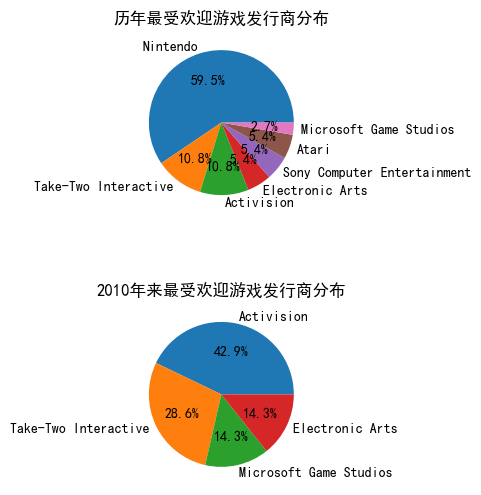

In [6]:
pub=pd.DataFrame(game['Publisher'].value_counts())
pub_r=pd.DataFrame(game2['Publisher'].value_counts())
fig,axj=plt.subplots(nrows=2,ncols=1,figsize=(6,6),dpi=100)
axes=axj.flatten()
axes[0].pie([x for y in pub.values for x in y],labels=list(pub.index),autopct='%1.1f%%')
axes[1].pie([x for y in pub_r.values for x in y],labels=list(pub_r.index),autopct='%1.1f%%')
axes[0].set_title("历年最受欢迎游戏发行商分布")
axes[1].set_title("2010年来最受欢迎游戏发行商分布")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.5)
plt.show()


- 分析：
由该饼状图可以看出每年最受欢迎的游戏中，有一大半是来自于Nintendo的。
但是自从2010年以来，最受欢迎的游戏主要来自于Activision、Take-Two Interactive,Nintendo甚至没有出现。
- 应用
对于游戏开发商来说，在发布新游戏之前，可以多分析学习Activision、Take-Two Interactive的热门游戏，来学习了解受欢迎的游戏发展趋势。

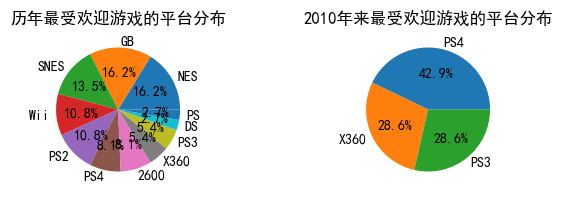

In [7]:
pla=pd.DataFrame(game['Platform'].value_counts())
pla_r=pd.DataFrame(game2['Platform'].value_counts())
fig,axj=plt.subplots(nrows=1,ncols=2,figsize=(6,6),dpi=100)
axes=axj.flatten()
axes[0].pie([x for y in pla.values for x in y],labels=list(pla.index),autopct='%1.1f%%')
axes[1].pie([x for y in pla_r.values for x in y],labels=list(pla_r.index),autopct='%1.1f%%')
axes[0].set_title("历年最受欢迎游戏的平台分布")
axes[1].set_title("2010年来最受欢迎游戏的平台分布")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.5)
plt.show()

- 分析：
由该饼状图可以看出每年最受欢迎的游戏中，使用平台的分布较为分散的。
但是自从2010年以来，最受欢迎的游戏使用平台主要在PS系列和X360
- 应用
对于游戏开发商来说，在发布新游戏之前，可以将使用平台确定为近年来热门的平台，可关注PS游戏主机的发布，并针对其研发新的游戏。

#### 从各地区总销量角度分析

In [8]:
region=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

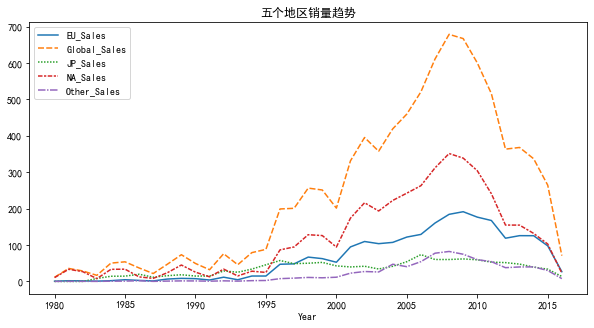

In [9]:
dt=dt_ord
market=pd.pivot_table(dt,index='Year',values=region,aggfunc=np.sum)
fig=plt.figure(figsize=(10,5))
sns.lineplot(data=market)
plt.title("五个地区销量趋势")
plt.rcParams['font.sans-serif']=['SimHei']

通过上图可以看出

- 北美地区的销量一直最高
- 游戏销量在2017~2019之间达到了峰值
- 从1995年开始销量显著上升，从2010年开始急剧下降

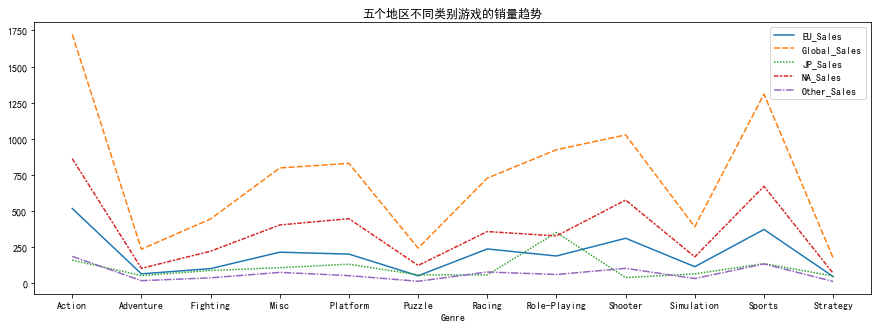

In [10]:
dt=dt_ord
market=pd.pivot_table(dt,index='Genre',values=region,aggfunc=np.sum)
fig=plt.figure(figsize=(15,5))
sns.lineplot(data=market)
plt.title("五个地区不同类别游戏的销量趋势")
plt.rcParams['font.sans-serif']=['SimHei']

- 分析：
 
 不同类别的游戏在五个地区的销量高低基本保持同样的趋势，唯有Role-Playing 在日本地区的销量相比其他地区要更高

Action、Shooter、Sports类别的游戏在各个地区的销量都较高
- 应用：

游戏开发商在宣传新游戏时，可以根据游戏的类别来选择在某地区的宣传力度，例如Role-Playing类别的游戏在宣传时可以将重心放在日本地区。

根据销量高的类别来开发新游戏可能可以达到相对来说更好的销量

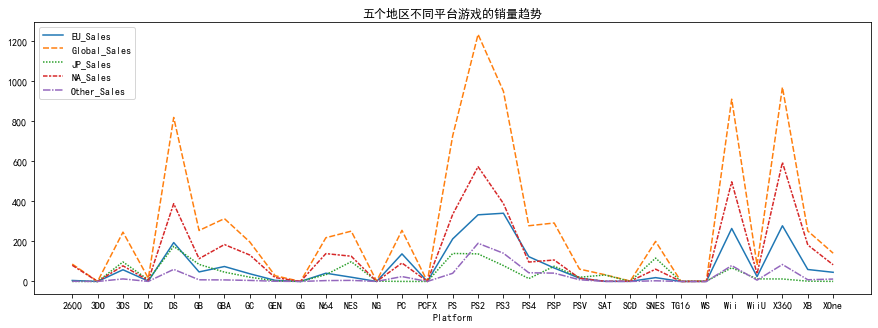

In [11]:
dt=dt_ord
market=pd.pivot_table(dt,index='Platform',values=region,aggfunc=np.sum)
fig=plt.figure(figsize=(15,5))
sns.lineplot(data=market)
plt.title("五个地区不同平台游戏的销量趋势")
plt.rcParams['font.sans-serif']=['SimHei']

- 分析：
 
 DS,PS系列，Wii,X360几个平台在各个地区都比较受欢迎，

- 应用：

游戏开发商在宣传新游戏时，可以根据游戏的平台来选择在某地区的宣传力度，例如NES平台上的游戏在宣传时可以将重心放在日本地区。


In [12]:
publisher=['Nintendo','Take-Two Interactive','Activision','Electronic Arts','Atari','Sony Computer Entertainment']

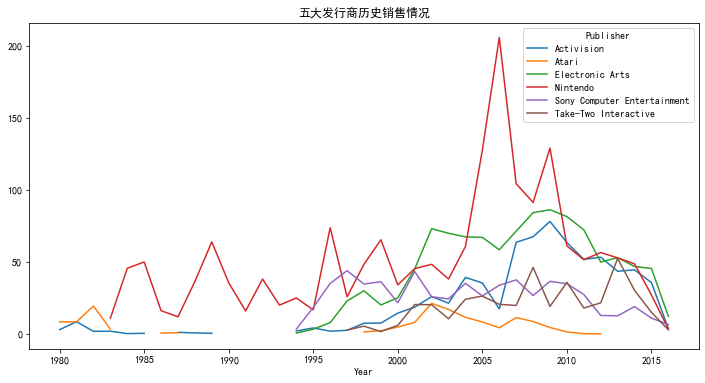

In [13]:
dt=dt_ord
dt =dt[dt['Publisher'].isin(publisher)]
sales_p=pd.pivot_table(data=dt,index='Year',columns='Publisher',values='Global_Sales',aggfunc=np.sum)
sales_p.plot(title='五大发行商历史销售情况',figsize=(12,6))


- 分析

Nintendo长期处于领先地位，尤其是2006年左右，达到峰值，远远超过其他发行商，而其他发行商在2006年左右这个节点销售额下降。
从2010年后各发行商销量纷纷下滑

## 预测

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import linear_model

对数据进行处理

In [15]:
dt=dt_ord
l_convert=['Platform','Genre','Publisher']
dt=dt.drop(["Name", "Rank"], axis=1)
#将属性值改为数值属性
number=LabelEncoder()
for item in l_convert:
    dt[item]=number.fit_transform(dt[item].astype('str'))
dt.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37


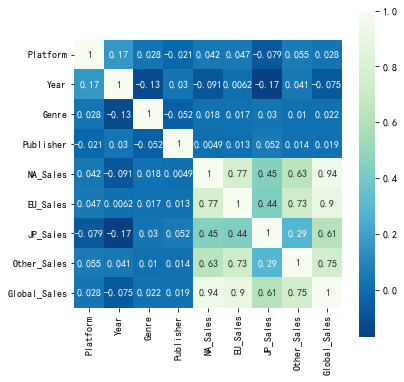

In [16]:
corr = dt.corr()
fig=plt.figure(figsize=(6,6))
sns.heatmap(corr,cmap='GnBu_r',square=True,annot=True)
plt.show()

#### 通过游戏平台、类别、发行商对全球销售额进行预测

In [17]:

labels=dt["Global_Sales"].values
features=dt[list(l_convert)].values

x=features
y=labels

#线性回归模型
lr_model=linear_model.LinearRegression()


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=1)
# 训练模型
lr_model.fit(x_train,y_train)


LinearRegression()

In [18]:
score_train=lr_model.score(x_train,y_train)
score_test=lr_model.score(x_test,y_test)
print( "Score in the training data", score_train)
print( "Score in the testing data", score_test)

Score in the training data 0.001992775778967615
Score in the testing data -0.0011269019069304331


In [19]:
scaler=StandardScaler()
scaler.fit(x_train)
x=train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

lr_model.fit(x_train,y_train)
score_train=lr_model.score(x_train,y_train)
score_test=lr_model.score(x_test,y_test)
print( "Score in the training data", score_train)
print( "Score in the testing data", score_test)

Score in the training data 0.001992775778967615
Score in the testing data -0.016624113620960168


获得的效果不佳

#### 通过某地区销量对全球销售额进行预测

In [20]:
l_convert=['EU_Sales'] #选择欧洲地区销量
labels=dt["Global_Sales"].values
features=dt[list(l_convert)].values

x=features
y=labels

#线性回归模型
lr_model=linear_model.LinearRegression()


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=1)
# 训练模型
lr_model.fit(x_train,y_train)


LinearRegression()

In [21]:
score_train=lr_model.score(x_train,y_train)
score_test=lr_model.score(x_test,y_test)
print( "Score in the training data", score_train)
print( "Score in the testing data", score_test)

Score in the training data 0.8203553778415338
Score in the testing data 0.781982351813173


#### 通过年份对未来年份全球销售额进行预测

In [22]:
dt_year=dt.groupby('Year',as_index=False).sum()
dt_year
labels=dt_year["Global_Sales"].values
features=dt_year["Year"].values.reshape(-1,1)
#线性回归模型
lr_model=linear_model.LinearRegression()
x=features
y=labels

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=1)
# 训练模型
lr_model.fit(x_train,y_train)

LinearRegression()

In [23]:
score_train=lr_model.score(x_train,y_train)
score_test=lr_model.score(x_test,y_test)
print( "Score in the training data", score_train)
print( "Score in the testing data", score_test)

Score in the training data 0.5567388240897657
Score in the testing data 0.6815850774169612
